# Exploring mutlislice simulation paramteres with Silicon
In these examples will be using the same structure and play around with some parameters and features of the **autoslic** program. 
Most of the arguments and parameters have been presented in [example_0](http://badb.rc-harwell.ac.uk:8888/notebooks/multislice/example_0.ipynb). 
- [Base simulation](#Base-simulation)
- [Reducing the slice thickness](#Reducing-the-slice-thickness)
- [Sampling](#Sampling)
- [Rocking curve](#Rocking-curve)
- [Padding](#Padding)

In [5]:
import multislice.multislice as mupy       # the temsim wrapper module
import multislice.postprocess as pp        # the temsim wrapper module
from utils import*                         # utilities
path = 'data/test/'

## Base simulation 


Since we will be simulating the same crystal orientation using different parameters, the `tail` parameter can be used to distinguish the simulations from one another by adding it to the naming convention. 

In [3]:
args = {'name':path,'mulslice':False,'data':'Si110.xyz','keV':200,
             'repeat':[3,2,20],'NxNy':512,'slice_thick':1.91,'Nhk':3}

In [26]:
multi0 = mupy.Multislice(tag='base', opt='srfp',ppopt='w',ssh='badb',**args)

Simu name pattern = test_base_autoslic
ax=3.840A, by=5.430, cz= 3.83959
thickness = 76.792 A
Decks saved :
/data3/lii26466/multislice/test/test_base_autoslic.in
object saved
/data3/lii26466/multislice/test/test_base_autoslic.pkl
Simulation already performed in the past.
/data3/lii26466/multislice/test/test_base_autoslic.sh

test_base_autoslic job submitted at Mon Apr 19 13:14:58 2021
...postprocessing...
done


loading data/test/test_base_autoslic.pkl
displaying pattern: (330, 330)


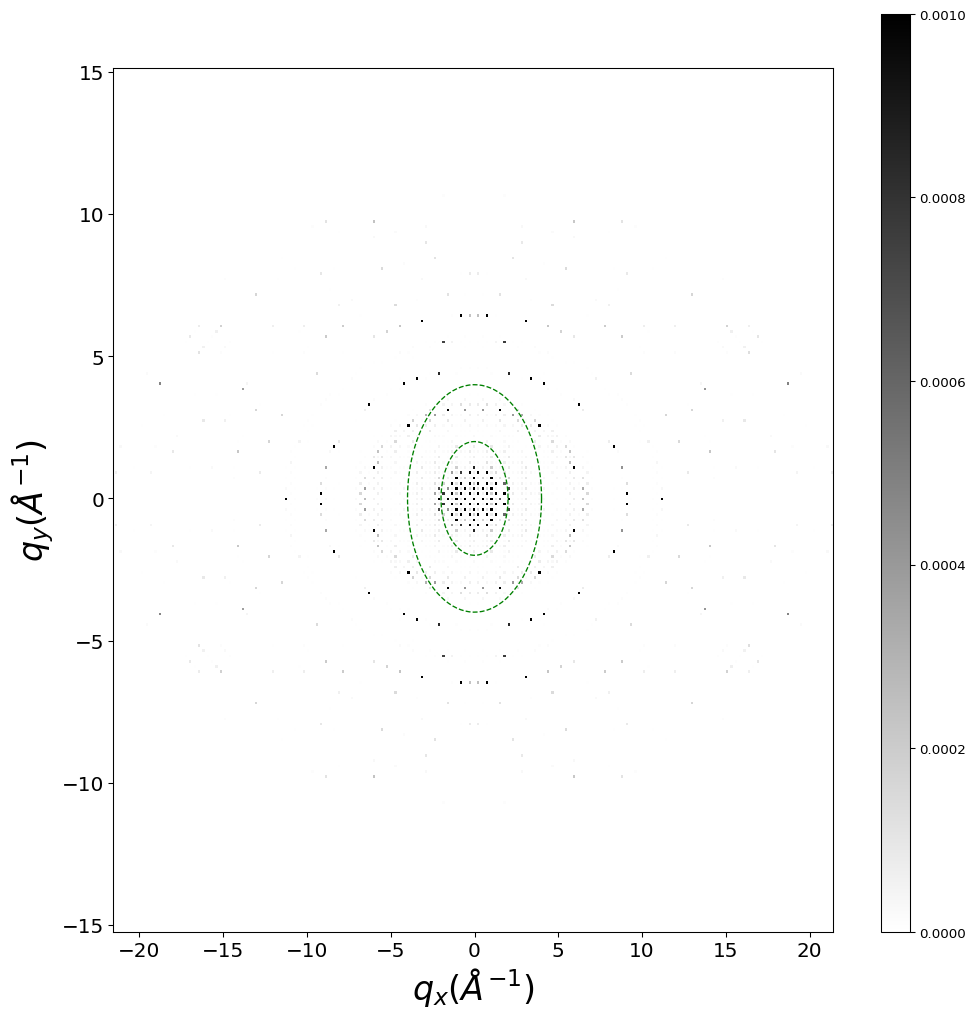

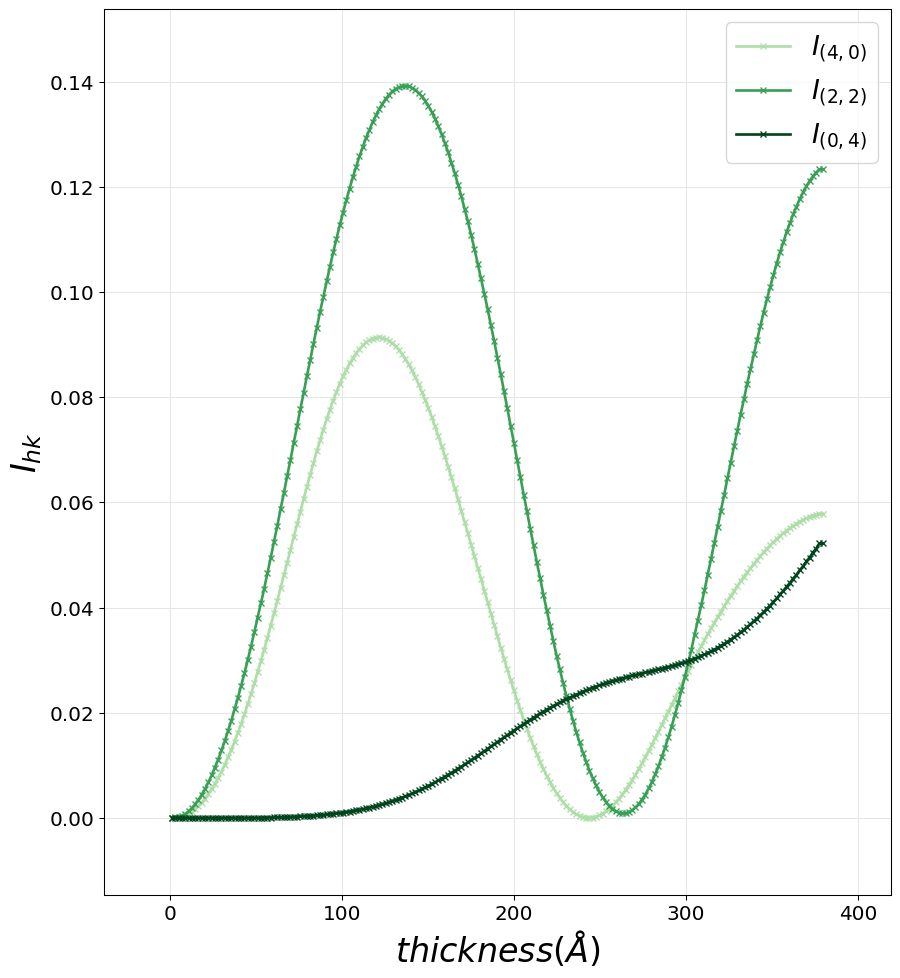

In [34]:
multi0 = pp.load(path,tag='base')
multi0.pattern(Iopt='cns',tol=1e-5,rings=[2,4],caxis=[0,0.001],xylims=5)
multi0.beam_vs_thickness()

## Reducing the slice thickness

Reducing the slice thickness in the current implementation of TEMSIM does not provide a more accurate simulaton. 
Indeed, if a slice does not contain the center of an atom, its transmission function will be  unity even though there is some electrostatic potential in this slice.  

Here we divide the slice thickness by 4 keeping all other things constants. 

In [18]:
args1=args.copy()
args1['slice_thick'] /= 4
multi1 = mupy.Multislice(tag='slice', opt='srfp',ppopt='w',ssh='badb',**args1)

Simu name pattern = test_slice_autoslic
ax=3.840A, by=5.430, cz= 3.83959
thickness = 383.959 A
Decks saved :
/data3/lii26466/multislice/test/test_slice_autoslic.in
object saved
/data3/lii26466/multislice/test/test_slice_autoslic.pkl
Simulation already performed in the past.
/data3/lii26466/multislice/test/test_slice_autoslic.sh

test_slice_autoslic job submitted at Fri Apr 16 10:13:49 2021


By comparing the beam evolution with thickness for the **base** and the reduced **slice** thickness simulation, it is clear that the addition of the intermediate slices do not have any effect on the propagation of the beam. 
This is obvious from the constant lines appearing in the thickness dependant evolution of the beam.

In [5]:
multi0 = pp.load(path,'base')
multi0.print_log()

loading data/test/test_base_autoslic.pkl
Imax=0.9971,zmax=385.8,cpuT=140.3,wallT=10.6
######################################################################
			.log FILE :
######################################################################

------------------------------------------------------------------------------
------------------------------------------------------------------------------
This header has been produced by multislice library
version : 1.4.2
date : Fri Apr 16 12:36:12 2021
author : Tarik Ronan Drevon
e-mail : tarik.drevon@stfc.ac.uk
------------------------------------------------------------------------------
------------------------------------------------------------------------------
autoslic(e) version dated 2-jun-2014 (ejk)
Copyright (C) 1998-2013 Earl J. Kirkland
This program is provided AS-IS with ABSOLUTELY NO WARRANTY
 under the GNU general public license

perform CTEM multislice with automatic slicing and FFTW
and multithreaded using openMP
 
Name of 

loading data/test/test_base_autoslic.pkl
loading data/test/test_slice_autoslic.pkl


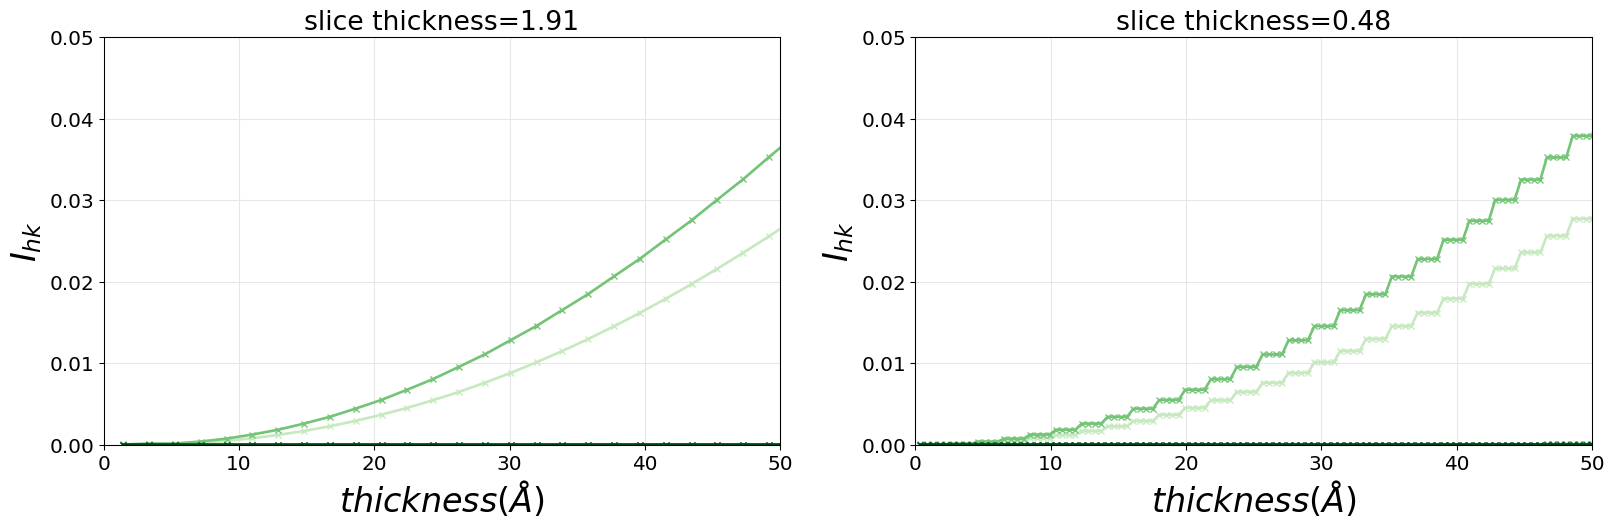

In [32]:
multi0 = pp.load(path,'base')
multi1 = pp.load(path,'slice')
fig,(ax0,ax1) = dsp.create_fig(figsize='21',rc='12')
multi0.beam_vs_thickness(tol=1e-3,xylims=[0,50,0,0.05],title='slice thickness=%.2f' %args['slice_thick'] ,ax=ax0,pOpt='tXG')
multi1.beam_vs_thickness(tol=1e-3,xylims=[0,50,0,0.05],title='slice thickness=%.2f' %args1['slice_thick'],ax=ax1,pOpt='tXG')

## Sampling
In this example we increase the sampling and the size of the super cell.

In [10]:
args_rep = args.copy();args_rep['repeat']=[9,6,20]
multi_rep = mupy.Multislice(tag='rep', opt='srp',ppopt='w',ssh='badb',**args_rep)

Simu name pattern = test_rep_autoslic
ax=3.840A, by=5.430, cz= 3.83959
thickness = 76.792 A
Decks saved :
/data3/lii26466/multislice/test/test_rep_autoslic.in
object saved
/data3/lii26466/multislice/test/test_rep_autoslic.pkl
Simulation already performed in the past.
...postprocessing...
done


In [11]:
args_Nxy = args_rep.copy();args_Nxy['NxNy']=2**11
multi_Nxy = mupy.Multislice(tag='Nxy', opt='srfp',ppopt='w',ssh='badb',**args_Nxy)

Simu name pattern = test_Nxy_autoslic
ax=3.840A, by=5.430, cz= 3.83959
thickness = 76.792 A
Decks saved :
/data3/lii26466/multislice/test/test_Nxy_autoslic.in
object saved
/data3/lii26466/multislice/test/test_Nxy_autoslic.pkl
Simulation already performed in the past.
/data3/lii26466/multislice/test/test_Nxy_autoslic.sh

test_Nxy_autoslic job submitted at Mon Apr 19 13:01:38 2021
...postprocessing...
done


loading data/test/test_base_autoslic.pkl
Imax=0.9995,zmax=78.3,cpuT=30.4,wallT=2.8
loading data/test/test_rep_autoslic.pkl
Imax=0.9960,zmax=78.3,cpuT=28.9,wallT=2.7
loading data/test/test_Nxy_autoslic.pkl
Imax=0.9998,zmax=78.3,cpuT=133.0,wallT=46.9
displaying pattern: (512, 512)
displaying pattern: (512, 512)
displaying pattern: (512, 512)


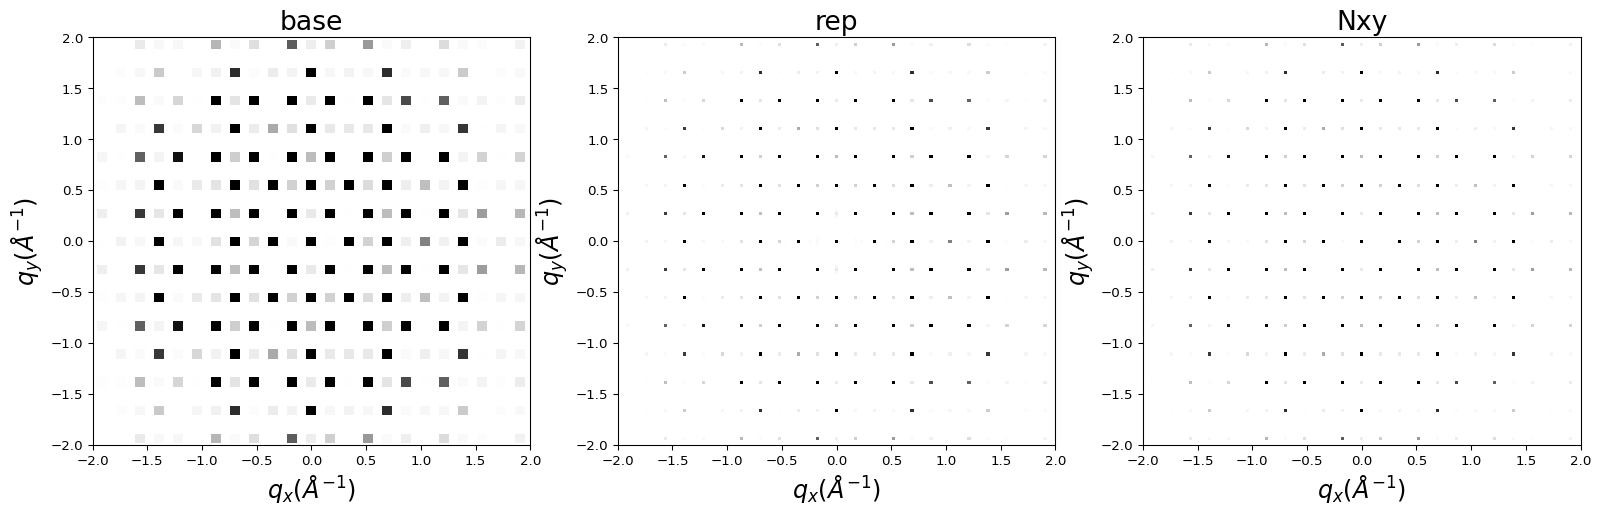

In [34]:
multi_base = pp.load(path,tag='base');multi_base.log_info()
multi_rep = pp.load(path,tag='rep');multi_rep.log_info()
multi_Nxy = pp.load(path,tag='Nxy');multi_Nxy.log_info()



fig,(ax0,ax1,ax2) = dsp.create_fig(figsize='21',rc=[1,3])
p_args={'xylims':2,'pOpt':'tX','fonts':{'lab':18,'tick':10},'caxis':[0,0.001]}
multi_base.pattern(Iopt='ns',tol=1e-5,ax=ax0,title='base',**p_args);
multi_rep.pattern( Iopt='ns',tol=1e-5,ax=ax1,title='rep' ,**p_args);
multi_Nxy.pattern( Iopt='ns',tol=1e-5,ax=ax2,title='Nxy' ,**p_args);

Due to the properties of the Discrete Fourier Transform, increasing the super cell size increases the reciprocal space resolution. 

Increasing the sampling keeping the super cell size constant increases the resolution in real space which is usually far greater than the experimental one. Besides, increasing the sampling provides a better conservation of the total intensity which comes at a greater computational cost. 

## Rocking curve
In this subsection we are showing how to simulate a rocking curve with temsim. This can be achieved by runing the same simulation with a slightly different tilt angle. 

To this end, we can use the class `Rocking` which will generate a series of tilted simulations from the `tilt` parameter. The constructor of this class is similar to `Multislice` but contains parameters`tx` and `ty` which are used to specify the range of tilt angles simulated. The tag for the simulations will automatically be of the form `<tag>_tilt<id>`. 

The simulation objects are stored in a dataframe which displays useful information. Since we are using the `badb` cluster, all those simulations should run simultaneously.

In [5]:
args_rock=args.copy();args_rock.update({'repeat':[3,2,200]})
rock = mupy.Rocking(tx=np.arange(-10,11)*0.01,ty=0, tag='tx',ssh='badb', opt='sr',v=0,**args_rock)

tilt: [-1.7453292519943295, 0.0] 
/data3/lii26466/multislice/test/test_tx_tilt000_autoslic.sh



/home/lii26466/.local/lib/python3.7/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.array(value)


tilt: [-1.5707963267948963, 0.0] 
/data3/lii26466/multislice/test/test_tx_tilt001_autoslic.sh

tilt: [-1.3962634015954638, 0.0] 
/data3/lii26466/multislice/test/test_tx_tilt002_autoslic.sh

tilt: [-1.2217304763960308, 0.0] 
/data3/lii26466/multislice/test/test_tx_tilt003_autoslic.sh

tilt: [-1.0471975511965976, 0.0] 
/data3/lii26466/multislice/test/test_tx_tilt004_autoslic.sh

tilt: [-0.8726646259971648, 0.0] 
/data3/lii26466/multislice/test/test_tx_tilt005_autoslic.sh

tilt: [-0.6981317007977319, 0.0] 
/data3/lii26466/multislice/test/test_tx_tilt006_autoslic.sh

tilt: [-0.5235987755982988, 0.0] 
/data3/lii26466/multislice/test/test_tx_tilt007_autoslic.sh

tilt: [-0.34906585039886595, 0.0] 
/data3/lii26466/multislice/test/test_tx_tilt008_autoslic.sh

tilt: [-0.17453292519943298, 0.0] 
/data3/lii26466/multislice/test/test_tx_tilt009_autoslic.sh

tilt: [0.0, 0.0] 
/data3/lii26466/multislice/test/test_tx_tilt010_autoslic.sh

tilt: [0.17453292519943298, 0.0] 
/data3/lii26466/multislice/tes

It is possible to display information about the full set of simulations by using the `update` method of the `Rocking` class. Those information are stored in a DataFrame `Rocking.df`.

In [3]:
rock = pp.rock_load(path,'')
rock.update()

DataFrame updated and saved : 
data/test/tilts.pkl
                                                    tilt state  zmax(A)  \
test_txtilt000_autoslic.pkl   [-1.7453292519943295, 0.0]  done  769.749   
test_txtilt001_autoslic.pkl   [-1.5707963267948963, 0.0]  done  769.749   
test_txtilt002_autoslic.pkl   [-1.3962634015954638, 0.0]  done  769.749   
test_txtilt003_autoslic.pkl   [-1.2217304763960308, 0.0]  done  769.749   
test_txtilt004_autoslic.pkl   [-1.0471975511965976, 0.0]  done  769.749   
test_txtilt005_autoslic.pkl   [-0.8726646259971648, 0.0]  done  769.749   
test_txtilt006_autoslic.pkl   [-0.6981317007977319, 0.0]  done  769.749   
test_txtilt007_autoslic.pkl   [-0.5235987755982988, 0.0]  done  769.749   
test_txtilt008_autoslic.pkl  [-0.34906585039886595, 0.0]  done  769.749   
test_txtilt009_autoslic.pkl  [-0.17453292519943298, 0.0]  done  769.749   
test_txtilt010_autoslic.pkl                   [0.0, 0.0]  done  769.749   
test_txtilt011_autoslic.pkl   [0.1745329251994329

DataFrame updated and saved : 
data/test/tilts.pkl


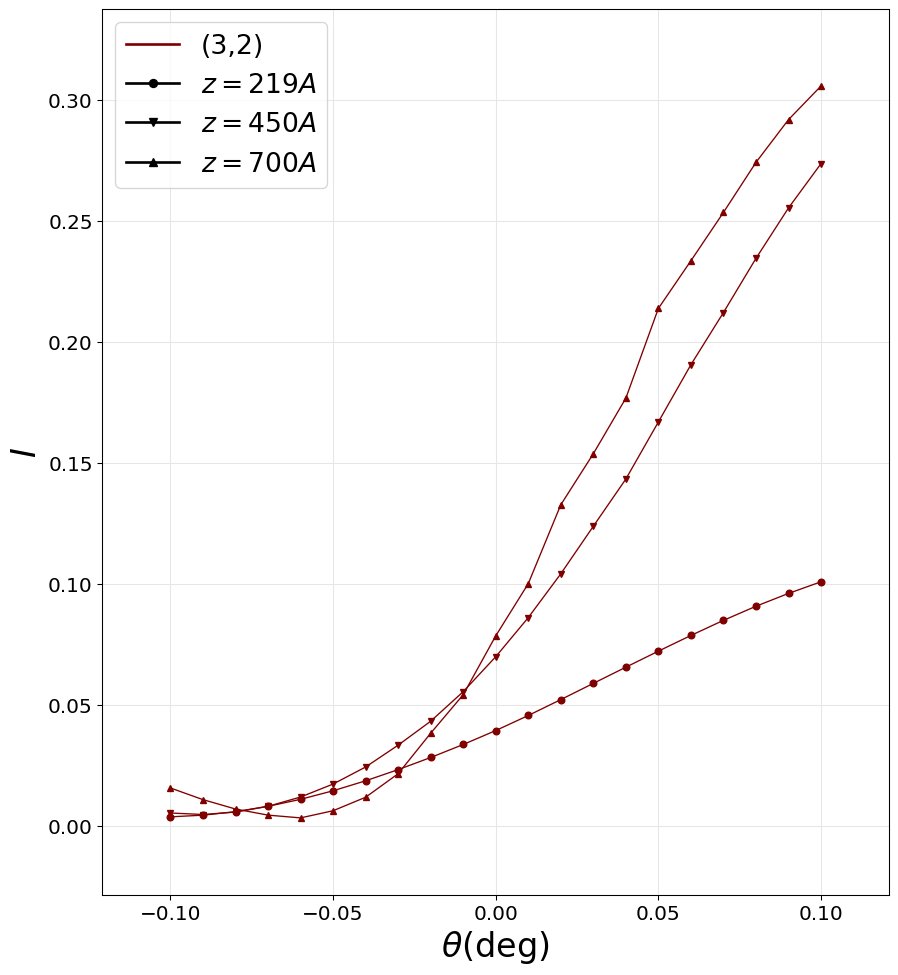

In [6]:
# rock.plot_rocking(iBs=[(3,2)],zs=[100,350,580])#iZs=slice(50,None,50))
rock.plot_rocking(iBs=[(3,2)],zs=[220,450,700])#iZs=slice(50,None,50))

Individual simulations can be accessed with `Rocking.load(id)`

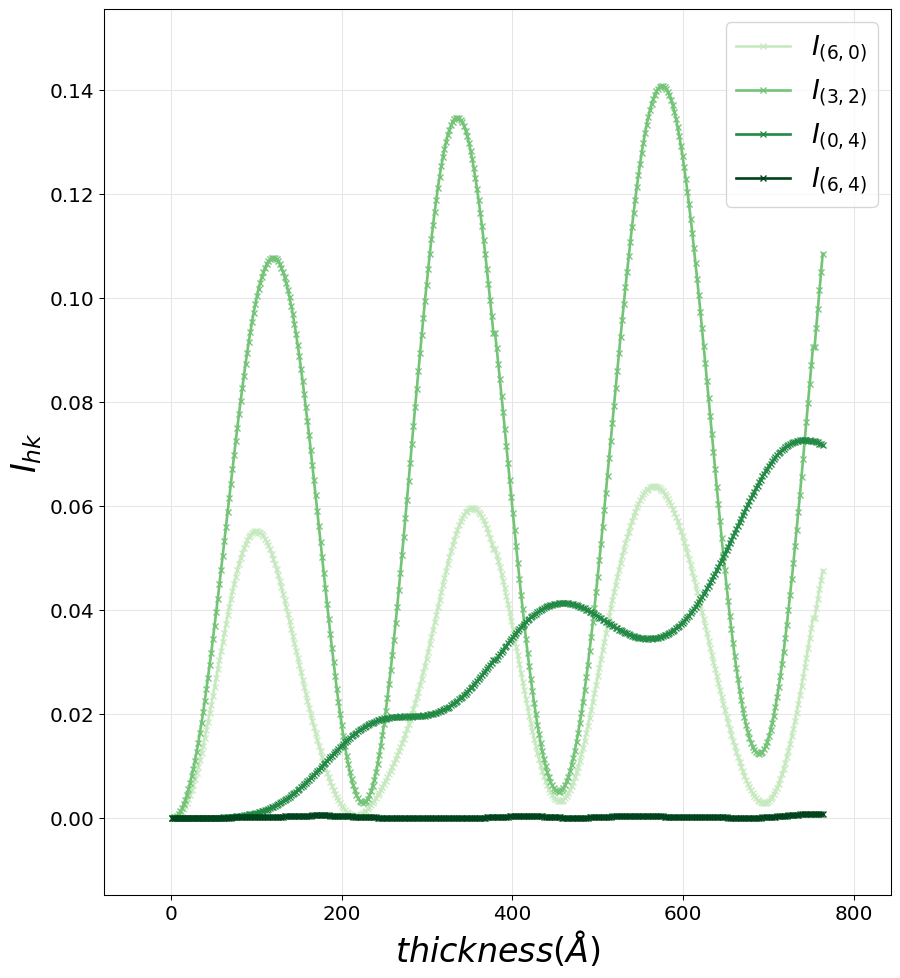

In [8]:
ms0 = rock.load(0)
ms0.beam_vs_thickness(tol=1e-4)